In [36]:
from pathlib import Path
import zarr
import matplotlib.pyplot as plt
import dask.array
import tifffile
import imagecodecs
from skimage import exposure, img_as_ubyte
import numpy as np
%matplotlib inline

In [109]:
plt.rcParams['figure.figsize'] = [10, 10]

In [7]:
def tiffs2zarr(filenames, zarrurl, chunksize, **kwargs):
    """Write images from sequence of TIFF files as zarr."""

    def imread(filename):
        # return first image in TIFF file as numpy array
        with open(filename, 'rb') as fh:
            data = fh.read()
        return imagecodecs.tiff_decode(data)

    with tifffile.FileSequence(imread, filenames) as tifs:
        with tifs.aszarr() as store:
            da = dask.array.from_zarr(store)
            chunks = (chunksize,) + da.shape[1:]
            da.rechunk(chunks).to_zarr(zarrurl, **kwargs)

In [ ]:
def downsample_zarr(dataset_path):
    
    original = zarr.open_array(dataset_path)

    da = dask.array.from_zarr(original)
    
    transformed = dask.array.map_blocks(lambda x=da: img_as_ubyte(exposure.rescale_intensity(x)), dtype='uint16')
    
    print("Rescaling complete!")
    
    zarr.save_array("snlkt/data/specialk/data2/2p_uint8.zarr", transformed)
    
    print("Zarr saved!")

In [8]:
datapath = Path("C:/Users/jdelahanty.SNL/Desktop/background_correlations/data/")

tiffs2zarr(datapath.glob('*Ch2*.tif'), "C:/Users/jdelahanty.SNL/Desktop/background_correlations/data/", 128)

In [113]:
original = zarr.open_array("C:/Users/jdelahanty.SNL/Desktop/background_correlations/data/data.zarr/")

In [79]:
artifact = Path("C:/Users/jdelahanty.SNL/Desktop/background_correlations/background__noise/")

tiffs2zarr(artifact.glob("*Ch2*"), "C:/Users/jdelahanty.SNL/Desktop/background_correlations/artifact/artifact.zarr", 128)

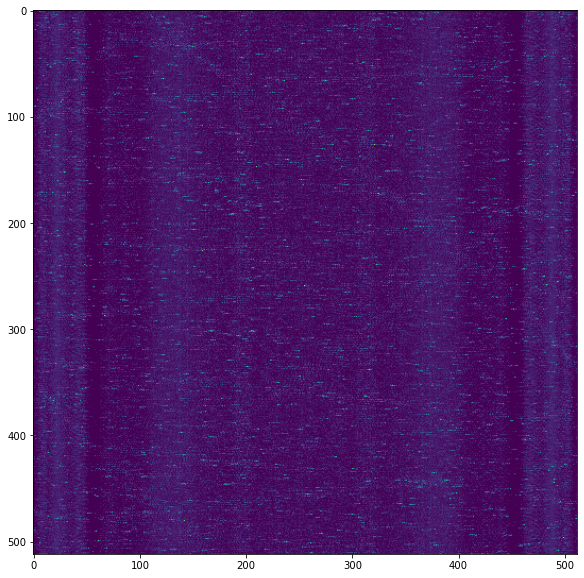

In [121]:
artifact_zarr = zarr.open_array("C:/Users/jdelahanty.SNL/Desktop/background_correlations/artifact/artifact.zarr")
artifact_image = artifact_zarr[0]
plt.imshow(artifact_image)

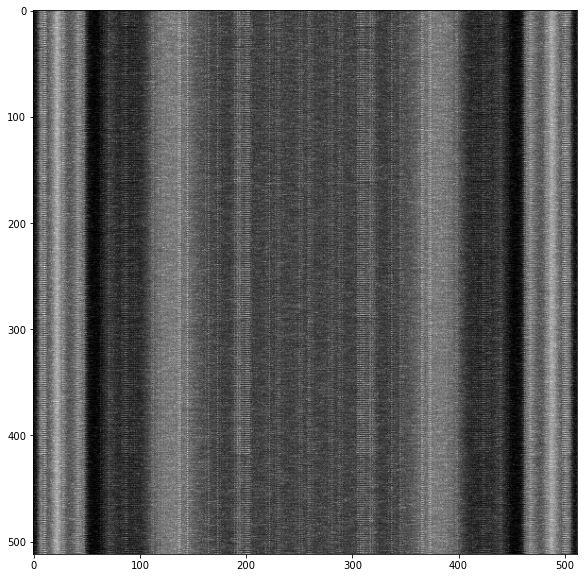

In [110]:
artifact_average = np.average(artifact_zarr[0:50], axis=0)
plt.imshow(artifact_average, cmap="gray")

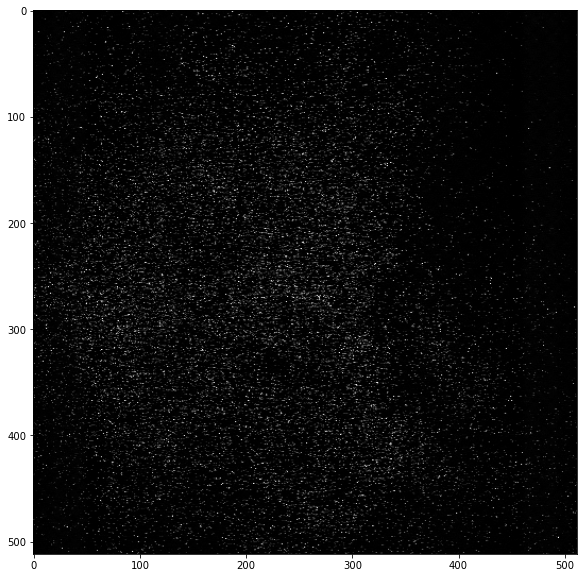

In [120]:
plt.imshow(original[0], cmap="gray")

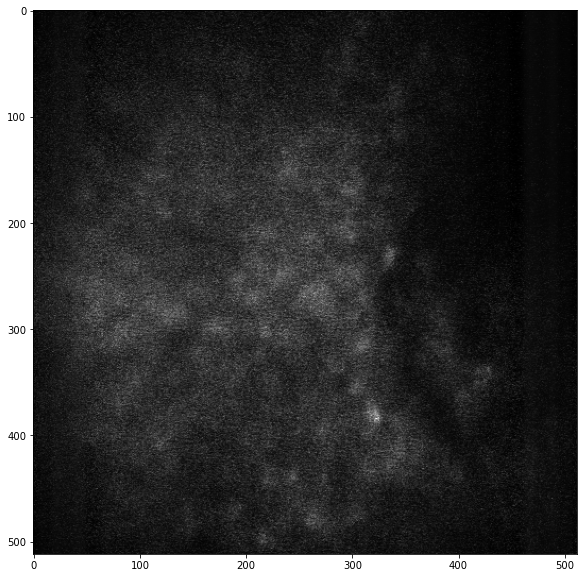

In [123]:
original_av = np.average(original[0:50], axis=0)
plt.imshow(original_av, cmap="gray")

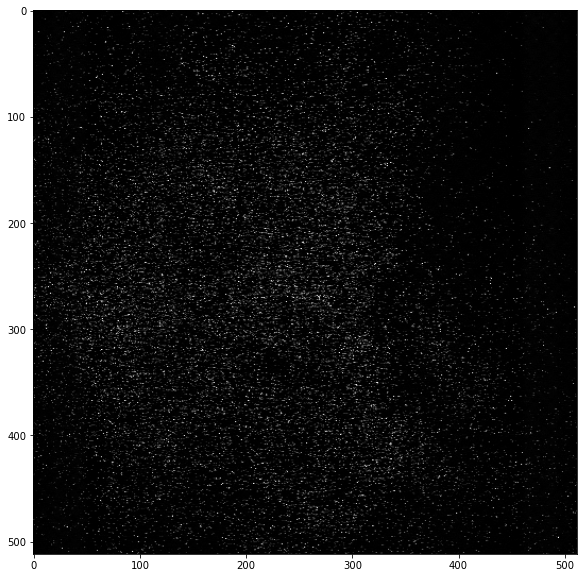

In [119]:
new = original - np.average(artifact_zarr[0])
plt.imshow(new[0], cmap="gray")

In [125]:
zarr.save( "C:/Users/jdelahanty.SNL/Desktop/background_correlations/subtract_1_artifact/subtract_1_artifact.zarr", new)



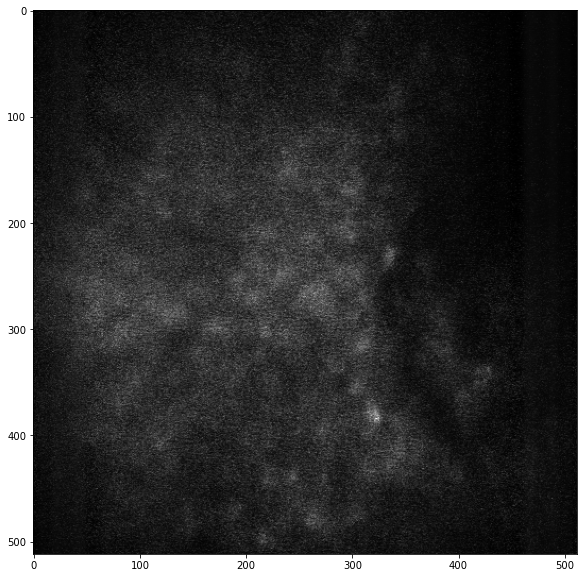

In [118]:
new_av = np.average(new[0:50], axis=0)
plt.imshow(new_av, cmap="gray")

In [35]:
average = np.average(partial, axis=0)
average

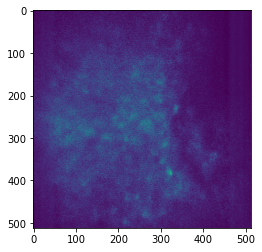

In [37]:
plt.imshow(average)

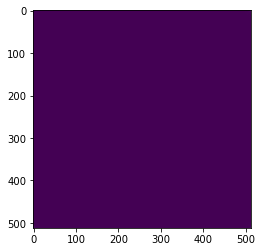

In [48]:
average_fft = np.fft.fft2(average)
plt.imshow(abs(average_fft))

In [57]:
test = abs(average_fft)
test.shape

(512, 512)

In [53]:
y = img_as_ubyte(exposure.rescale_intensity(test))

In [54]:
y

array([[255,  71,  23, ...,  10,  23,  71],
       [ 53,  22,   2, ...,   8,  14,  23],
       [  7,   9,   8, ...,   3,   6,   5],
       ...,
       [ 10,   3,   3, ...,   1,   4,   3],
       [  7,   5,   6, ...,   7,   8,   9],
       [ 53,  23,  14, ...,   6,   2,  22]], dtype=uint8)

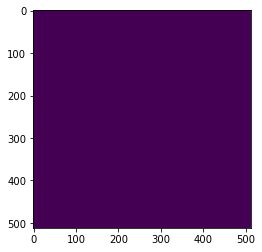

In [56]:
plt.imshow(y)

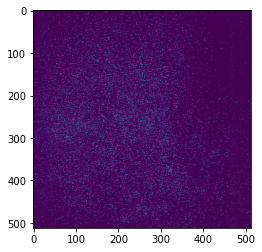

In [77]:
for i in enumerate(partial):
    plt.imshow(i[1])
    

[[  0   0   0 ...   0  45   0]
 [  0   0   0 ...   0   5   0]
 [  1  13   0 ...  39   9   0]
 ...
 [  0   0   0 ...   0   0   0]
 [ 28   0  26 ...   0 199   3]
 [  0  18  22 ...   0   0 179]]
[[  0   0  24 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...  55  15  21]
 ...
 [281  92  63 ...   0   0  15]
 [599  70   0 ...   0   0  31]
 [  0  31  43 ...   0   0   0]]
[[  0  26   0 ...   0   0   0]
 [  0   0   0 ...  41  16 273]
 [ 23  20  33 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0   0   0]
 [  2   0   0 ...  50  12  51]]
[[ 0  0  1 ...  8 25  0]
 [ 0  0  0 ...  0  0 17]
 [20  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0  0 10]
 [ 0  0  0 ... 21  0 32]]
[[  0   0   0 ...   0  70   0]
 [  0   0   0 ...  24   0  39]
 [  0  18   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 571  17   0]]
[[363  91   0 ...   0   0  35]
 [  0  54   0 ...  57   0   0]
 [  0   0   0 